In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [ ]:
#boston.keys()

In [4]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
#df = pd.read_csv('prostate.csv')

In [5]:
df['Target'] = boston.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [ ]:
df.describe()

In [8]:
X = df.drop('Target',axis=1)
#print( newX[0:3]) 
y = df['Target']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

print(len(X_train), len(y_train))

379 379


In [ ]:
#import statsmodels.formula.api as smf

In [ ]:
#linear_model = smf.ols(formula = 'Target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = df)
#result = linear_model.fit()
#print(result.summary())

In [ ]:
#linear_model = smf.ols(formula = 'Target ~ CRIM + ZN  + CHAS + NOX + RM  + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = df)
#result = linear_model.fit()
#print(result.summary())

In [9]:
import statsmodels.api as sm

In [10]:
X_new = sm.add_constant(X_train)
linear_model = sm.OLS(y_train, X_new)
result = linear_model.fit()

C:\Users\Vipin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     87.74
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          1.12e-103
Time:                        14:31:30   Log-Likelihood:                -1094.5
No. Observations:                 379   AIC:                             2217.
Df Residuals:                     365   BIC:                             2272.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7158      5.687      5.928      0.0

In [14]:
Xn_test = sm.add_constant(X_test)

yp_test = result.predict(Xn_test)
yp_train = result.predict(X_new)
train_MSE = np.mean((y_train-yp_train)**2)
test_MSE = np.mean((y_test - yp_test)**2)
print('Linear Regression Train RMSE: ', np.sqrt(train_MSE))
print('Linear Regression Test RMSE: ',np.sqrt(test_MSE))

Linear Regression Train RMSE:  4.344997221048134
Linear Regression Test RMSE:  5.695835030617259


In [59]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
yp_test = linear_model.predict(X_test)
yp_train = linear_model.predict(X_train)
train_MSE = np.mean((y_train-yp_train)**2)
test_MSE = np.mean((y_test - yp_test)**2)
print('Linear Regression Train RMSE: ', np.sqrt(train_MSE))
print('Linear Regression Test RMSE: ',np.sqrt(test_MSE))

Linear Regression Train RMSE:  4.344997221048133
Linear Regression Test RMSE:  5.695835030617242


In [61]:
print(linear_model.intercept_ , linear_model.coef_)

33.71578930966669 [-1.25880432e-01  5.75701579e-02 -1.64176782e-02  1.26424476e+00
 -1.53889114e+01  3.49476939e+00  1.14889216e-02 -1.47070952e+00
  2.92530481e-01 -1.22132679e-02 -8.41219182e-01  1.24793327e-02
 -5.36883458e-01]


## Ridge Regression

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaler = scaler.fit(X_train)
features_standardized = Scaler.transform(X_train)

In [16]:
from sklearn.linear_model import Ridge

r_regression = Ridge()
ridge_model = r_regression.fit(features_standardized, y_train)

In [17]:
X_test_standardized = Scaler.transform(X_test)
y_pred = ridge_model.predict(X_test_standardized)

In [18]:
y_train_pred = ridge_model.predict(features_standardized)

In [19]:
train_MSE_Ridge = np.mean((y_train_pred - y_train)**2)
print("Train RMSE Ridge:",np.sqrt(train_MSE_Ridge))
test_MSE_Ridge = np.mean((y_pred - y_test)**2)
print("Test RMSE Ridge:",np.sqrt(test_MSE_Ridge))

Train RMSE Ridge: 4.345204828480925
Test RMSE Ridge: 5.696812203080081


In [41]:
print(ridge_model.coef_)

[-1.34547539e-04  1.40578714e-04 -1.75715439e-04  4.79224416e-05
 -1.55977117e-04  2.26650310e-04 -1.42012035e-04  1.01117385e-04
 -1.36408712e-04 -1.67087245e-04 -1.69807167e-04  1.17116764e-04
 -2.50560091e-04]


In [21]:
from sklearn.linear_model import RidgeCV

In [22]:
regr_cv = RidgeCV(alphas = np.arange(0.01, 100, 0.01))
model_cv = regr_cv.fit(features_standardized, y_train)

In [24]:
lambda_best = model_cv.alpha_

In [40]:
#r_regression = Ridge(alpha = lambda_best)

r_regression = Ridge(alpha = 10000000 )
ridge_model = r_regression.fit(features_standardized, y_train)

In [27]:
print(model_cv.score(features_standardized, y_train))
#print(linear_model.score(X_train, y_train))

0.7572012912275411


In [28]:
y_train_pred = ridge_model.predict(features_standardized)

test_MSE_Ridge = np.mean((y_pred - y_test)**2)
print("Test RMSE Ridge:",np.sqrt(test_MSE_Ridge))

Test RMSE Ridge: 5.696812203080081


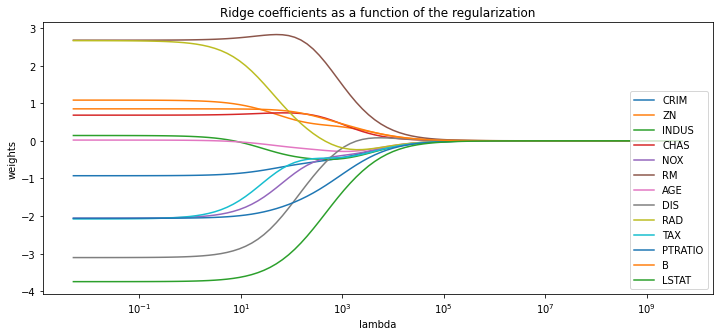

In [31]:
from sklearn.preprocessing import scale
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

plt.figure(figsize = (12, 5))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.legend(loc = 'lower right', labels = df.columns)
plt.title('Ridge coefficients as a function of the regularization');

## LASSO

In [42]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso(alpha = 9)
lasso_model = lasso.fit(features_standardized, y_train)

In [44]:
yl_pred = lasso_model.predict(X_test_standardized)
yl_pred_train = lasso_model.predict(features_standardized)

In [45]:
train_MSE_Lasso = np.mean((yl_pred_train - y_train)**2)
print("Train RMSE:",np.sqrt(train_MSE_Lasso))
test_MSE_Lasso = np.mean((yl_pred - y_test)**2)
print("Test RMSE:",np.sqrt(test_MSE_Lasso))

Train RMSE: 5.009606219754482
Test RMSE: 6.225368829953495


In [58]:
lasso_model.coef_

array([-1.14181475,  1.35350955, -0.11759307,  0.30042003, -1.75561125,
        2.362343  ,  0.28446162, -3.07506188,  2.48849193, -2.00630178,
       -1.7938375 ,  1.19138172, -3.7996803 ])

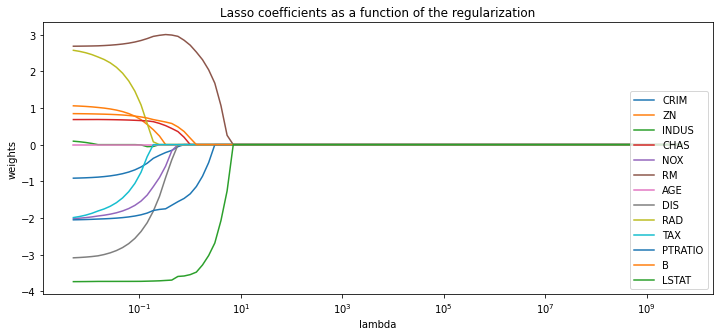

In [48]:
from sklearn.preprocessing import scale
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso()
coefs = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)

plt.figure(figsize = (12, 5))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.legend(loc = 'lower right', labels = df.columns)
plt.title('Lasso coefficients as a function of the regularization');

In [53]:
from sklearn.linear_model import LassoCV

In [55]:
import numpy as np
model = LassoCV(alphas = np.arange(0.001, 1, 0.001) )
model.fit(features_standardized, y_train)
model.alpha_

0.008

In [56]:
lasso = Lasso(alpha = 0.008)
lasso_model = lasso.fit(features_standardized, y_train)

In [57]:
yl_pred = lasso_model.predict(X_test_standardized)
test_MSE_Lasso = np.mean((yl_pred - y_test)**2)
print("Test RMSE:",np.sqrt(test_MSE_Lasso))

Test RMSE: 5.695600814918453


In [62]:
d = np.c_[linear_model.coef_, ridge_model.coef_, lasso_model.coef_]
d = pd.DataFrame(d)
d.columns = ['Linear_Model', 'Ridge_Model', 'Lasso_Model']
#d.shape
d

,Linear_Model,Ridge_Model,Lasso_Model
0,-0.125880,-0.000135,-1.141815
1,0.057570,0.000141,1.353510
2,-0.016418,-0.000176,-0.117593
3,1.264245,0.000048,0.300420
4,-15.388911,-0.000156,-1.755611
5,3.494769,0.000227,2.362343
6,0.011489,-0.000142,0.284462
7,-1.470710,0.000101,-3.075062
8,0.292530,-0.000136,2.488492
9,-0.012213,-0.000167,-2.006302


## ElasticNet

In [63]:
from sklearn.linear_model import ElasticNet

In [64]:
EN = ElasticNet(alpha = 1, l1_ratio = 1)
EN_model = EN.fit(features_standardized, y_train)

In [65]:
ye_pred = EN_model.predict(X_test_standardized)
ye_train_pred = EN_model.predict(features_standardized)

In [66]:
test_MSE_EN = np.mean((ye_pred - y_test)**2)
print(np.sqrt(test_MSE_EN))
train_MSE_EN = np.mean((ye_train_pred - y_train)**2)
np.sqrt(train_MSE_EN)

6.225368829953495


5.009606219754482

In [67]:
from sklearn.linear_model import ElasticNetCV

In [69]:
EN_cv = ElasticNetCV(alphas = np.arange(0.0001, 0.1, 0.001))
EN_model_cv = EN_cv.fit(features_standardized, y_train)
EN_model_cv.alpha_

0.0121

In [70]:
EN = ElasticNet(alpha = 0.0121, l1_ratio = 0.5)
EN_model = EN.fit(features_standardized, y_train)

In [71]:
ye_pred = EN_model.predict(X_test_standardized)
ye_train_pred = EN_model.predict(features_standardized)

In [72]:
test_MSE_EN = np.mean((ye_pred - y_test)**2)
print(np.sqrt(test_MSE_EN))

5.69872356005715


In [76]:
lm = LogisticRegression()

NameError: name 'LogisticRegression' is not defined

In [89]:
newdf = df[0:3]

In [74]:
newdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [90]:
X = newdf.drop('Target', axis = 1)
Y = newdf['Target']

In [91]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
model.coef_

array([-1.49792418e-03, -3.36802990e-02,  8.59852393e-03,  0.00000000e+00,
       -1.50993402e-04,  2.80645077e-02, -6.57368543e-01,  2.82741348e-03,
        1.98657974e-03, -1.24628709e-01,  2.34706771e-03, -1.03870711e-01,
       -1.86818948e-01])

In [94]:
lmodel = Ridge(alpha = 0.1)
lmodel.fit(X,Y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
lmodel.coef_

array([ 4.56108475e-05, -3.97651265e-02,  1.05156668e-02,  0.00000000e+00,
       -1.52432985e-04,  2.86806447e-02, -6.45874718e-01,  1.93766625e-03,
        2.20917369e-03, -1.19295379e-01,  5.52293423e-03, -1.54600641e-01,
       -1.84915311e-01])

In [92]:
rmodel = Lasso(alpha = 0.1)
rmodel.fit(X,Y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
rmodel.coef_

array([ 0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.7338916 ,  0.        ,  0.        , -0.14193234,
        0.        , -0.        , -0.        ])

In [79]:
import statsmodels.api as sm

In [80]:
model = sm.OLS(Y,X)

In [81]:
result = model.fit()

In [82]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 29 Jul 2020   Prob (F-statistic):                nan
Time:                        15:27:45   Log-Likelihood:                 88.004
No. Observations:                   3   AIC:                            -170.0
Df Residuals:                       0   BIC:                            -172.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.0002        inf          0        n

C:\Users\Vipin\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\Vipin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Vipin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\Vipin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\Vipin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Vipin\